In [3]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.linear_model import LinearRegression
import os
import pandas as pd

In [4]:



def detect_circle(path: str, max_min_radius: tuple):
    original_pil = Image.open(path)
    gray_pil = original_pil.convert("L")
    gray = np.array(gray_pil)

    gray_blur = cv2.GaussianBlur(gray, (9, 9), 2)

    circles = cv2.HoughCircles(
        gray_blur,
        cv2.HOUGH_GRADIENT,
        dp=1.2,
        minDist=100,
        param1=100,
        param2=30,
        minRadius=max_min_radius[0],
        maxRadius=max_min_radius[1]
    )

    frame = np.array(original_pil)


    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        circles = sorted(circles, key=lambda x: x[2], reverse=True)

        x, y, r = circles[0]
        cv2.circle(frame, (x, y), r, (0, 255, 0), 4)
        n = 18
        r_reduced = max(1, r - n)
        cv2.circle(frame, (x, y), r_reduced, (255, 0, 255), 2)

        mask = np.zeros_like(gray)
        cv2.circle(mask, (x, y), r_reduced, (255, 255, 255), -1)
        masked = cv2.bitwise_and(gray, mask)

    else:
        masked = np.zeros_like(gray)

    return masked


In [5]:
path_list = os.listdir("fotos_teste")
order = []

for i in range(len(path_list)):
    for j in range(len(path_list)):
        if int(path_list[j][:2]) == i:
            order.append(path_list[j])


In [6]:
def ordenar(item):
    partes = item.split()
    num_principal = int(partes[0])
    num_placa = int(partes[2])
    hora = partes[3].replace('.jpg', '')
    return (num_principal, num_placa, hora)

order.sort(key=ordenar)

for i in order[:10]:
    print(i)

0 placa 1 15:21:07.jpg
0 placa 2 15:21:13.jpg
0 placa 3 15:21:18.jpg
1 placa 1 15:51:32.jpg
1 placa 2 15:51:38.jpg
1 placa 3 15:51:43.jpg
2 placa 1 16:21:56.jpg
2 placa 2 16:22:01.jpg
2 placa 3 16:22:07.jpg
3 placa 1 16:52:20.jpg


In [7]:
path_image_list = ['fotos_teste/' + i for i in order]

In [8]:
df = pd.DataFrame()
datas = []
samples = []

for path in path_image_list:
    for i in range(1,4):
        id = "placa " + str(i)
        if id in path:
            id_name = id
    
    data = path[-12:].removesuffix('.jpg').replace("_",":")

    datas.append(data)
    samples.append(id_name)


df['Hora'] = datas
df['Amostra'] = samples
df['Pasta'] = path_image_list

In [14]:



matrix_medias = []

for j in range(1,4):
    filtro = df['Amostra'] == f'placa {j}'
    df_p_uso = df[filtro]

    medias = []
    progresso = []

    for i,pasta in enumerate(df_p_uso['Pasta']):
        
        imagem = detect_circle(pasta,(200,210))
        media = imagem.reshape(-1).mean()

        medias.append(media)
        progresso.append(i)

    matrix_medias.append(medias)



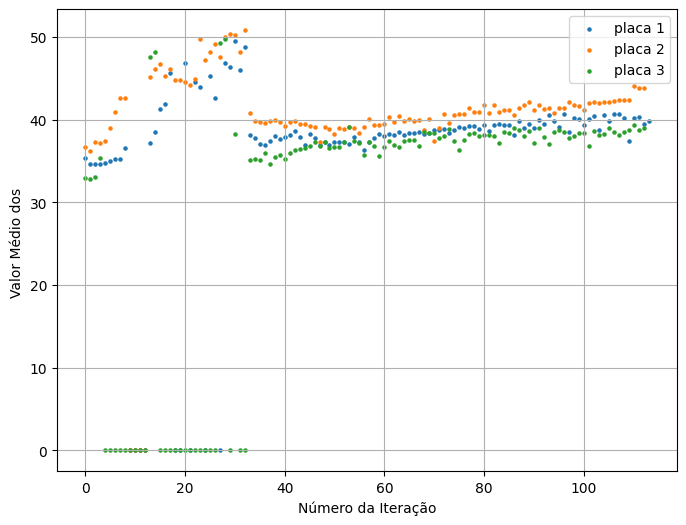

In [19]:
plt.figure(figsize=(8,6))
plt.grid()
for i in range(3):
    plt.scatter([j for j in range(len(matrix_medias[i]))],matrix_medias[i], label=f'placa {i+1}',s=5)

    plt.legend()
    plt.ylabel("Valor Médio dos ")

    plt.xlabel("Número da Iteração")
